In [8]:
import numpy as np
import os
import os.path as path
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Wedge, Polygon, Ellipse, Rectangle
from matplotlib.collections import PatchCollection
import pandas as pd
import itertools as it
import pickle
import io

In [9]:
from importlib import reload
import util
from util import *
reload(util)
from util import *

# load_data

In [10]:
data_root = r'E:\Projects\TreasureHunter\data'
files = [f[:-4] for f in os.listdir(path.join(data_root, 'map'))]

In [11]:
samples = load_or_generate_samples_dict('samples_dict.pkl', data_root)

In [12]:
df = load_or_generate_df('df_with_matched.pkl', data_root, samples)

In [13]:
df

,sp1_idx,sp2_idx,sp1_matched,sp2_matched,n_matched,n_shared_kw,n_kw_occur_sp1,n_kw_occur_sp2,norm_diff_avg,norm_diff_std,norm_avg_std,max_direction,direction,matches_diff_std
0,X00016469612,X00016469619,"[63, 54, 17, 50, 23, 51, 62, 29, 31, 52, 12, 1...","[58, 61, 13, 50, 18, 52, 57, 25, 41, 59, 7, 10...",31,27,34,43,0.166634,0.115720,0.202874,0.782713,17,0.142660
1,X00016469612,X00016469620,"[45, 54, 26, 50, 23, 51, 47, 12, 16, 20, 33, 3...","[53, 66, 58, 74, 64, 60, 4, 16, 7, 73, 48, 51,...",20,16,22,22,0.315675,0.205239,0.376529,0.730731,1,0.261045
2,X00016469612,X00016469622,"[32, 54, 17, 26, 50, 23, 51, 28, 21, 52, 12, 1...","[29, 64, 9, 16, 50, 20, 51, 55, 19, 62, 6, 8, ...",25,21,27,29,0.154826,0.135502,0.205748,0.738462,17,0.141952
3,X00016469612,X00016469623,"[45, 54, 26, 50, 23, 51, 47, 12, 20, 33, 34, 3...","[60, 73, 65, 81, 71, 67, 4, 16, 80, 55, 58, 61...",19,15,20,22,0.320045,0.214769,0.385428,0.742254,1,0.267680
4,X00016469612,X00016469669,"[63, 32, 54, 17, 27, 26, 50, 23, 51, 62, 21, 5...","[42, 23, 35, 13, 16, 15, 30, 19, 32, 41, 17, 3...",29,25,32,30,0.122434,0.117931,0.169994,0.759121,17,0.120101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195620,X51008164998,X51009453801,"[69, 60, 26, 68, 25, 17, 48, 52, 58, 21, 44, 1...","[63, 54, 25, 62, 24, 16, 39, 43, 52, 20, 51, 7...",31,21,37,37,0.145418,0.143579,0.204356,0.733391,3,0.140289
195621,X51008164998,X51009453804,"[60, 6, 17, 52, 58, 21, 12, 7, 8, 19, 67, 30, ...","[51, 4, 18, 37, 49, 21, 7, 5, 6, 22, 63, 47, 5...",30,19,32,33,0.212901,0.134682,0.251924,0.778078,1,0.159042
195622,X51008164999,X51009453801,"[88, 79, 26, 87, 25, 17, 71, 67, 77, 21, 60, 1...","[63, 54, 25, 62, 24, 16, 39, 43, 52, 20, 51, 4...",31,21,45,37,0.159161,0.153446,0.221083,0.727220,2,0.153386
195623,X51008164999,X51009453804,"[79, 6, 17, 71, 77, 21, 12, 7, 8, 19, 86, 30, ...","[51, 4, 18, 37, 49, 21, 7, 5, 6, 22, 63, 47, 5...",31,20,38,34,0.228857,0.136812,0.266633,0.731620,1,0.170548


# check results

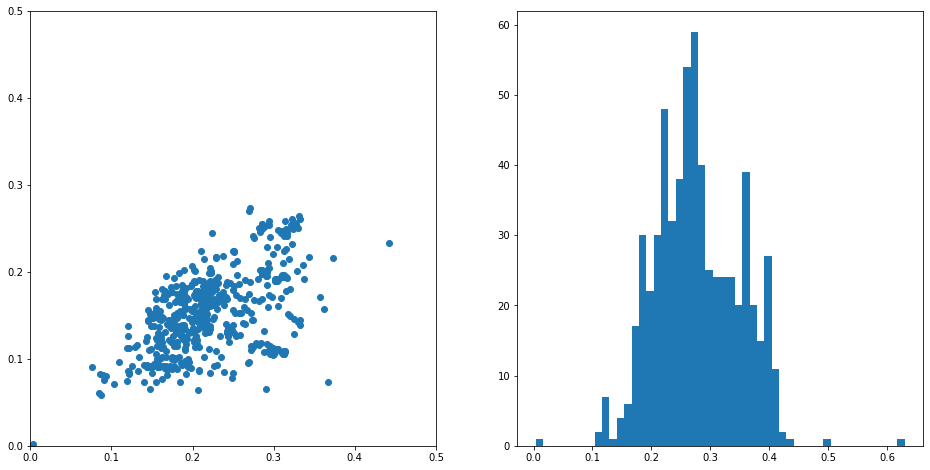

In [14]:
sp_fn = 'X51009453801'
df_sp = df[(df['sp1_idx']==sp_fn)|(df['sp2_idx']==sp_fn)]

f, axs = plt.subplots(1, 2, figsize=(16,8))
axs[0].scatter(df_sp['norm_diff_avg'], df_sp['norm_diff_std'])
axs[0].set_ylim(ymin=0, ymax=0.5)
axs[0].set_xlim(xmin=0, xmax=0.5)
hs = axs[1].hist(df_sp['norm_avg_std'], bins=50)

In [15]:
hs

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,  7.,  1.,  4.,  6.,
        17., 30., 22., 30., 48., 32., 38., 54., 59., 40., 25., 24., 24.,
        24., 20., 39., 20., 15., 27., 11.,  2.,  1.,  0.,  0.,  0.,  0.,
         1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([0.00358564, 0.01610102, 0.02861639, 0.04113177, 0.05364715,
        0.06616253, 0.07867791, 0.09119328, 0.10370866, 0.11622404,
        0.12873942, 0.14125479, 0.15377017, 0.16628555, 0.17880093,
        0.19131631, 0.20383168, 0.21634706, 0.22886244, 0.24137782,
        0.25389319, 0.26640857, 0.27892395, 0.29143933, 0.30395471,
        0.31647008, 0.32898546, 0.34150084, 0.35401622, 0.36653159,
        0.37904697, 0.39156235, 0.40407773, 0.41659311, 0.42910848,
        0.44162386, 0.45413924, 0.46665462, 0.47916999, 0.49168537,
        0.50420075, 0.51671613, 0.52923151, 0.54174688, 0.55426226,
        0.56677764, 0.57929302, 0.59180839, 0.60432377, 0.61683915,
        0.62935453]),
 <BarContainer

In [32]:
df_sp[df_sp['norm_avg_std']<1.15].sort_values('norm_avg_std')

,sp1_idx,sp2_idx,sp1_matched,sp2_matched,n_matched,n_shared_kw,n_kw_occur_sp1,n_kw_occur_sp2,norm_diff_avg,norm_diff_std,norm_avg_std,max_direction,direction,matches_diff_std
44098,X51005453801,X51009453801,"[63, 54, 44, 31, 29, 47, 26, 62, 11, 22, 23, 4...","[63, 54, 45, 32, 30, 48, 27, 62, 12, 23, 24, 4...",60,45,61,61,0.002894,0.002117,0.003586,0.787343,0,0.002535
125498,X51006350763,X51009453801,"[64, 55, 45, 25, 48, 27, 63, 12, 23, 24, 49, 3...","[63, 54, 45, 25, 48, 27, 62, 12, 23, 24, 49, 3...",59,43,59,59,0.084489,0.060623,0.103989,0.918472,6,0.054746
125123,X51006350750,X51009453801,"[64, 55, 45, 25, 48, 27, 63, 12, 23, 24, 49, 3...","[63, 54, 45, 25, 48, 27, 62, 12, 23, 24, 49, 3...",59,43,59,59,0.086668,0.058730,0.104693,0.889504,6,0.055360
174095,X51006857071,X51009453801,"[63, 54, 47, 32, 62, 18, 29, 48, 39, 22, 41, 4...","[63, 54, 48, 27, 62, 12, 24, 49, 37, 16, 39, 4...",46,32,47,48,0.090455,0.075685,0.117942,0.880817,6,0.067696
105098,X51005757286,X51009453801,"[52, 43, 36, 51, 22, 17, 41, 16, 20, 5, 19, 21...","[63, 54, 45, 62, 24, 16, 52, 20, 21, 4, 18, 22...",25,18,26,33,0.076571,0.090973,0.118908,0.820930,2,0.084079
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52243,X51005577192,X51009453801,"[53, 55, 24, 49, 52, 21, 16, 45, 50, 19, 26, 5...","[54, 45, 25, 48, 27, 24, 16, 39, 43, 21, 51, 4...",28,19,30,33,0.332988,0.260727,0.422918,0.709502,12,0.296115
189737,X51007391372,X51009453801,"[65, 67, 24, 61, 64, 21, 16, 57, 62, 19, 26, 5...","[54, 45, 25, 48, 27, 24, 16, 39, 43, 21, 51, 4...",28,19,32,33,0.331735,0.264653,0.424369,0.688560,12,0.297589
120932,X51006329399,X51009453801,"[53, 55, 49, 52, 22, 43, 41, 50, 66, 17, 23, 6...","[54, 45, 48, 27, 24, 16, 39, 43, 52, 21, 51, 4...",27,17,36,29,0.373095,0.215752,0.430986,0.717389,4,0.290266
4970,X00016469676,X51009453801,"[38, 21, 49, 22, 13, 50, 12, 44, 27, 3, 28, 32...","[48, 20, 21, 51, 4, 14, 18, 22, 26, 31, 36, 40...",13,8,13,17,0.442097,0.233149,0.499808,0.716323,17,0.350564


avg norm: 0.3329879796681919, norm std: 0.26072725690161097, norm avg&std 0.4229180737388068


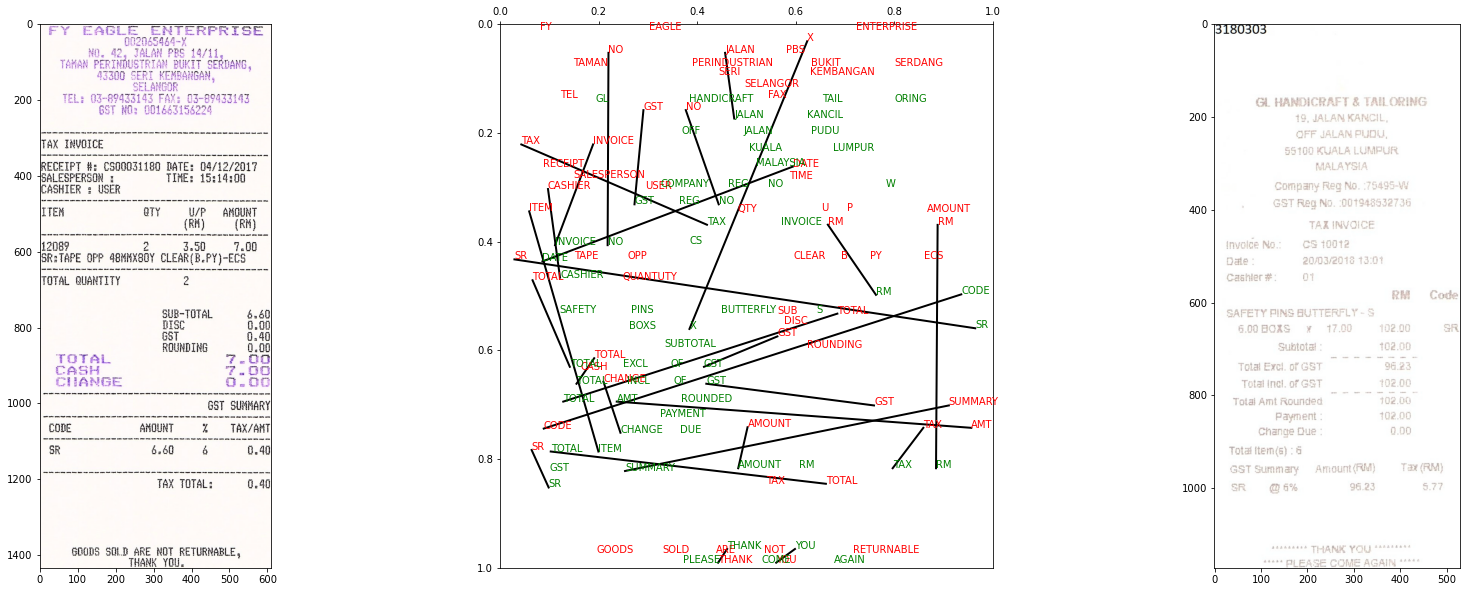

In [36]:
# show mapping
df_idx = 52243

sp1_idx, sp2_idx, sp1_matched, sp2_matched, n_matched, n_shared_kw, n_kw_occur_sp1, n_kw_occur_sp2, norm_diff_avg, norm_diff_std, norm_avg_std, _, _, _ = df.loc[df_idx]
sp1, sp2 = samples[sp1_idx], samples[sp2_idx]
#sp1_matched, sp2_matched, n_shared_kw, n_kw_occur_sp1, n_kw_occur_sp2, norm_diff_avg, norm_diff_std = try_mapping_1(sp1, sp2)
print('avg norm: {}, norm std: {}, norm avg&std {}'.format(norm_diff_avg, norm_diff_std, norm_avg_std))
show_mapping(sp1, sp2, mapping=(sp1_matched, sp2_matched), imshow=True)

In [87]:
tmp = np.arange(-1,1,0.1)
x, y = np.meshgrid(tmp, tmp)

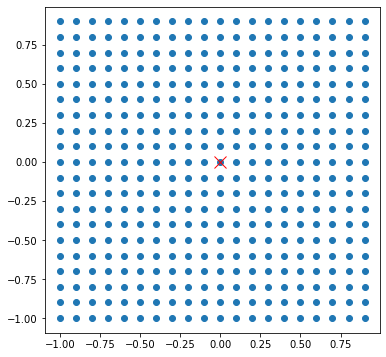

In [73]:
fig, ax1 = plt.subplots(figsize=(6, 6))
plt.plot([0], [0], 'rx', markersize=12)
plt.scatter(x, y)

In [88]:
tmp = np.stack([x.flatten(), y.flatten()], axis=1)
tmp.shape

(400, 2)

In [84]:
tmp_diff = diff.reshape((-1, 1, 2))
tmp_diff = np.repeat(tmp_diff, 400, axis=1)

In [101]:
diff_to_anchor = tmp_diff - tmp
norm_diff_to_anchor = np.linalg.norm(diff_to_anchor, axis=2)

(28, 400)

In [102]:
norm_diff_to_anchor

array([[1.45564774, 1.39021495, 1.32909175, ..., 1.09402065, 1.16218262,
        1.2346885 ],
       [0.99208041, 0.96863081, 0.95512709, ..., 1.70758158, 1.79160736,
        1.87719979],
       [1.54988946, 1.48568897, 1.42561778, ..., 0.99974025, 1.06985743,
        1.14442531],
       ...,
       [1.03896463, 1.00060747, 0.97107318, ..., 1.58272739, 1.6633682 ,
        1.74601305],
       [1.70804925, 1.66591194, 1.62883178, ..., 1.00969152, 1.1033165 ,
        1.19797231],
       [1.42409543, 1.35292972, 1.28560876, ..., 1.13753359, 1.19847976,
        1.26440689]])

In [93]:
tmp.shape, (tmp_diff - tmp).shape

((400, 2), (28, 400, 2))

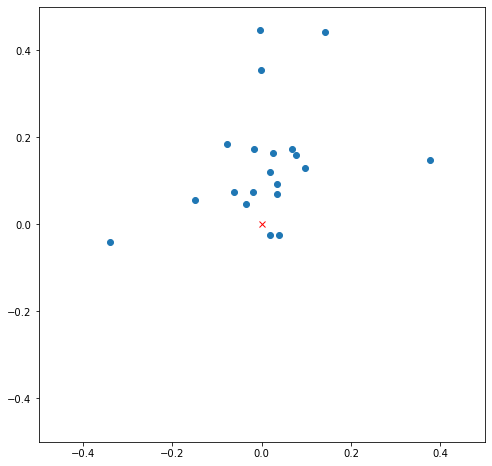

In [79]:
diff = sp2.centers[sp2_matched]-sp1.centers[sp1_matched]
x,y=diff[:,0], diff[:,1]

fig, ax1 = plt.subplots(figsize=(8,8))
ax1.set_ylim(ymin=-0.5, ymax=0.5)
ax1.set_xlim(xmin=-0.5, xmax=0.5)
plt.plot([0], [0], 'rx')
plt.scatter(x, y)

In [12]:
generate_diff_std_for_matches(df)

e:\anaconda3\envs\py38\lib\site-packages\numpy\core\_methods.py:216: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
e:\anaconda3\envs\py38\lib\site-packages\numpy\core\_methods.py:185: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
e:\anaconda3\envs\py38\lib\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [8]:
def generate_diff_std_for_matches(df):
    df['matches_diff_std'] = [np.std(samples[sp2_idx].centers[sp2_matched]-samples[sp1_idx].centers[sp1_matched]) for sp1_idx, sp2_idx, sp1_matched, sp2_matched in zip(df['sp1_idx'], df['sp2_idx'], df['sp1_matched'], df['sp2_matched'])]

In [ ]:
def max_direction(sp1, sp2, sp1_matched, sp2_matched):
    agl = np.arange(0, np.pi, np.pi/18)
    x, y = np.cos(agl), np.sin(agl)
    xy = np.stack([x, y], axis=0)

    diff = sp2.centers[sp2_matched]-sp1.centers[sp1_matched]
    dot = np.dot(norm_to_unit_vector(diff), xy)
    abs_dot = np.abs(dot)
    avg_abs_dot = np.average(abs_dot, axis=0)
    return np.max(avg_abs_dot), np.argmax(avg_abs_dot)

def generate_direction_for_matches(df):
    tmp = [max_direction(samples[sp1_idx], samples[sp2_idx], sp1_matched, sp2_matched) for sp1_idx, sp2_idx, sp1_matched, sp2_matched in zip(df['sp1_idx'], df['sp2_idx'], df['sp1_matched'], df['sp2_matched'])]
    tmp = np.asarray(tmp)
    df['max_direction'] = tmp[:,0]
    df['direction'] = np.array(tmp[:,1], dtype=np.int)

In [ ]:
def pretty_print(matrix):
    for d in matrix:
        for dd in d:
            print ('{:>10.6f}'.format(dd), end=', ')
        print()
pretty_print(dot)

  0.065816,   0.238087,   0.403125,   0.555914,   0.691812,   0.806689,   0.897056,   0.960165,   0.994101,   0.997832,   0.971244,   0.915145,   0.831240,   0.722078,   0.590976,   0.441918,   0.279432,   0.108456, 
 -0.999702,  -0.980275,  -0.931063,  -0.853561,  -0.750123,  -0.623894,  -0.478708,  -0.318977,  -0.149554,   0.024413,   0.197639,   0.364859,   0.520994,   0.661298,   0.781509,   0.877974,   0.947762,   0.988754, 
  0.697359,   0.811222,   0.900436,   0.962291,   0.994908,   0.997295,   0.969379,   0.912009,   0.826929,   0.716722,   0.584739,   0.434988,   0.272020,   0.100788,  -0.073508,  -0.245569,  -0.410169,  -0.562307, 
  0.979059,   0.928835,   0.850388,   0.746103,   0.619148,   0.473380,   0.313229,   0.143560,  -0.030470,  -0.203575,  -0.370494,  -0.526156,  -0.665831,  -0.785275,  -0.880858,  -0.949678,  -0.989642,  -0.999536, 
 -0.919337,  -0.837045,  -0.729320,  -0.599434,  -0.451335,  -0.289523,  -0.118913,   0.055309,   0.227851,   0.393470,   0.547134, 

In [ ]:
from importlib import reload
import util
from util import *
reload(util)
from util import *

In [ ]:
np.linalg.norm(new_output, axis=1)

array([1., 1., 1.])

In [ ]:
def norm_to_unit_vector(arr):
    return arr/np.linalg.norm(arr, axis=1).reshape(-1,1)